In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:

sample_name = 'test1q'

input_filebase = 'bootstrap-output-%s' % sample_name

#input_filebase = 'toygen-output-%s' % sample_name

ncalc = 1000
npoints = 1000

In [3]:
with open('%s.npy' % input_filebase,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    bootstrap_weights = np.load(f)

In [4]:
train_pts.shape

(100000, 2)

## Check the particle and detector distributions

<function matplotlib.pyplot.show(close=None, block=None)>

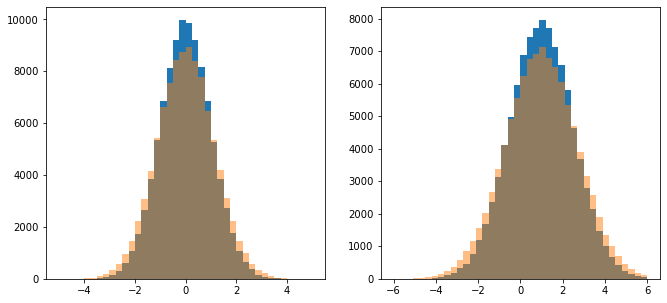

In [5]:
fig,ax = plt.subplots( 1, 2, figsize=(11,5))

hbins=40
x0min=-5
x0max=5
x1min=-6
x1max=6

ax[0].hist( train_pts[:,0], bins=hbins, range=[x0min,x0max] )
ax[0].hist( train_det_pts[:,0], bins=hbins, range=[x0min,x0max], alpha=0.5 )

ax[1].hist( train_pts[:,1], bins=hbins, range=[x1min,x1max] )
ax[1].hist( train_det_pts[:,1], bins=hbins, range=[x1min,x1max], alpha=0.5 )

plt.show

In [6]:
train_det_pts

array([[ 1.01526748,  1.17128025],
       [-2.85927191,  1.85756474],
       [-0.21974432,  0.33502947],
       ...,
       [ 0.02278741,  0.94862594],
       [ 2.04799432,  2.68492884],
       [ 0.92243278,  1.06224067]])

In [7]:
true_det_pts

array([[-0.33854906,  0.97505979],
       [ 0.00823275,  3.40365172],
       [ 0.54558851,  3.07761729],
       ...,
       [ 2.16396004, -3.32099241],
       [-0.28297049,  2.3937366 ],
       [-0.06159399,  0.88009894]])

In [8]:
true_det_pts.shape

(1000, 2)

In [9]:
bootstrap_weights

array([[0.01586571, 0.00702024, 0.01332512, ..., 0.00604053, 0.00658777,
        0.01276954],
       [0.01835   , 0.00565197, 0.01382688, ..., 0.00611988, 0.01102332,
        0.01788197],
       [0.01156018, 0.00409588, 0.01183704, ..., 0.00592581, 0.00473687,
        0.01012579],
       ...,
       [0.01317356, 0.00417217, 0.01270001, ..., 0.00510016, 0.00127831,
        0.01357153],
       [0.01217829, 0.00954852, 0.01278063, ..., 0.0095922 , 0.00165397,
        0.01217937],
       [0.01155929, 0.00593151, 0.01202866, ..., 0.00679699, 0.00047194,
        0.01100221]])

In [10]:
bootstrap_weights.shape

(250, 100000)

In [11]:
#ncalc = len(bootstrap_weights[0])

corr_array = np.zeros( ncalc )
print(" ncalc = %d" % ncalc)

point_index = 57

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


 ncalc = 1000


<function matplotlib.pyplot.show(close=None, block=None)>

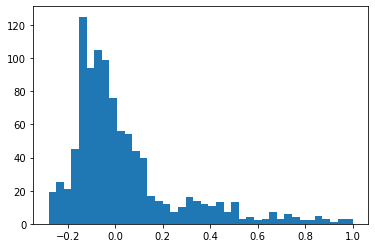

In [12]:
plt.hist( corr_array, bins=40)
plt.show

In [13]:
train_pts[point_index]

array([-1.12005439,  0.9155488 ])

In [14]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

In [15]:
corr_array.shape

(1000,)

In [16]:
df0.shape

(100000,)

In [17]:
df0[:ncalc].shape

(1000,)

<function matplotlib.pyplot.show(close=None, block=None)>

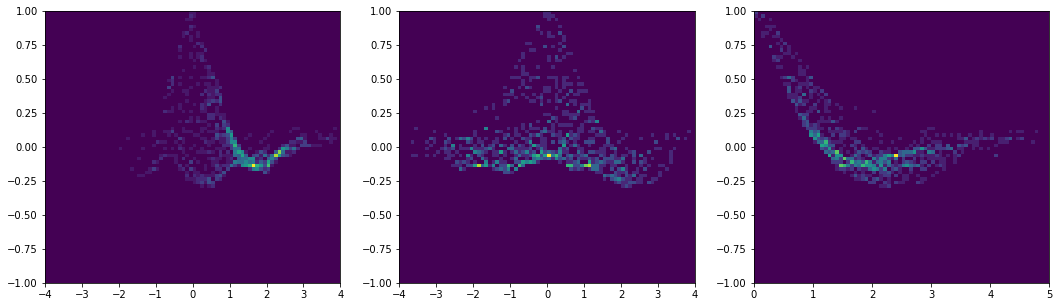

In [18]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0[:ncalc], corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1[:ncalc], corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr[:ncalc], corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

In [19]:
%%time



for point_index in range(npoints) :
    
    if (point_index % (npoints/10) == 0 ) :
        print(" Working on point %3d" % point_index)
        
    this_point_corr_array = np.zeros(ncalc)
    
    for i in range(ncalc) :
        #if i == point_index : continue
        pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
        this_point_corr_array[i] = pair_cor[0,1]
    
    if point_index == 0 :
        all_points_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        all_points_df1 = train_pts[:ncalc,1] - train_pts[point_index,1]
        all_points_dr = np.sqrt( all_points_df0*all_points_df0 + all_points_df1*all_points_df1)
        all_points_corr_array = this_point_corr_array
        all_points_f0b = train_pts[:ncalc,0]
        all_points_f1b = train_pts[:ncalc,1]
    else :
        this_point_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        this_point_df1 = train_pts[:ncalc,1] - train_pts[point_index,1]  
        this_point_dr = np.sqrt( this_point_df0*this_point_df0 + this_point_df1*this_point_df1 )
        all_points_df0 = np.append( all_points_df0, this_point_df0 )
        all_points_df1 = np.append( all_points_df1, this_point_df1 )
        all_points_dr = np.append( all_points_dr, this_point_dr )
        all_points_corr_array = np.append(all_points_corr_array, this_point_corr_array)
        all_points_f0b = np.append(all_points_f0b, train_pts[:ncalc,0] )
        all_points_f1b = np.append(all_points_f1b, train_pts[:ncalc,1] )


 Working on point   0
 Working on point 100
 Working on point 200
 Working on point 300
 Working on point 400
 Working on point 500
 Working on point 600
 Working on point 700
 Working on point 800
 Working on point 900
CPU times: user 55.3 s, sys: 3.34 s, total: 58.6 s
Wall time: 58.6 s


In [20]:
all_points_corr_array.shape

(1000000,)

In [21]:
all_points_df0.shape

(1000000,)

<function matplotlib.pyplot.show(close=None, block=None)>

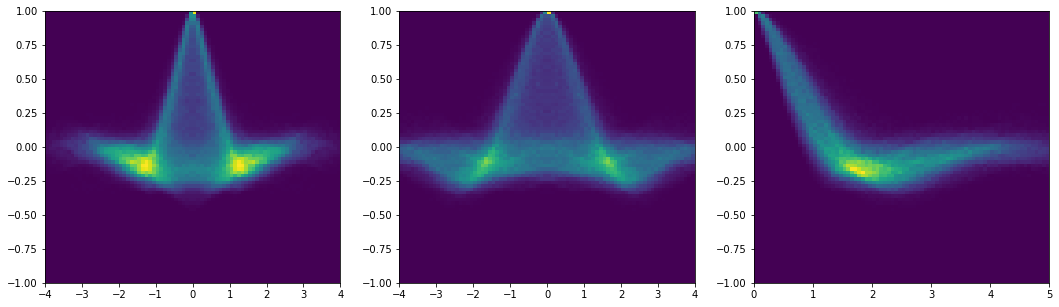

In [22]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( all_points_df1, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], range=([0,5],[-1,1]))

plt.savefig('plots/correlation-vs-distance-%s.png' % sample_name, bbox_inches='tight')
plt.savefig('plots/correlation-vs-distance-%s.pdf' % sample_name, bbox_inches='tight')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

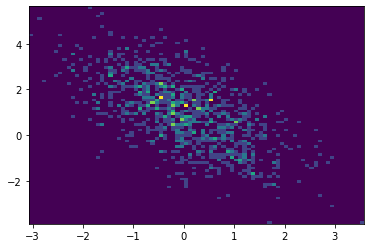

In [23]:
plt.hist2d( all_points_f0b, all_points_f1b, bins=[80,80] )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

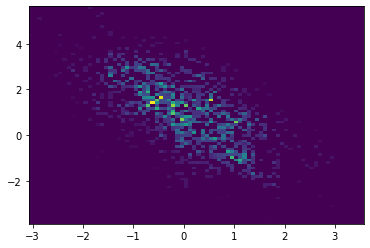

In [24]:
plt.hist2d( all_points_f0b[all_points_corr_array>0.8], all_points_f1b[all_points_corr_array>0.8], bins=[80,80] )
plt.show

## Save the output

In [25]:
output_filebase = 'correlations/correlations-%s' % sample_name

In [26]:
with open( '%s.npy' % output_filebase, 'wb') as f :
    np.save(f, all_points_df0)
    np.save(f, all_points_df1)
    np.save(f, all_points_dr)
    np.save(f, all_points_corr_array)
    

In [27]:
with open( '%s-feature-coords.npy' % output_filebase, 'wb') as f :
    np.save(f, all_points_f0b)
    np.save(f, all_points_f1b)

## Check the particle and detector distributions

<function matplotlib.pyplot.show(close=None, block=None)>

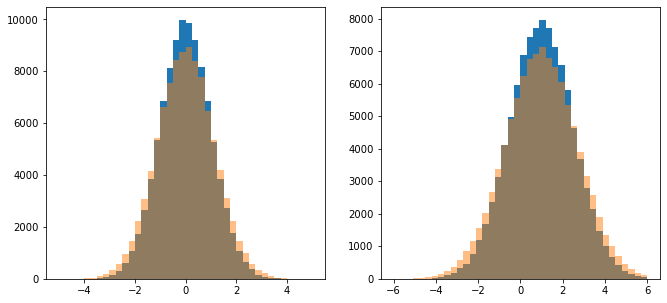

In [28]:
fig,ax = plt.subplots( 1, 2, figsize=(11,5))

hbins=40
x0min=-5
x0max=5
x1min=-6
x1max=6

ax[0].hist( train_pts[:,0], bins=hbins, range=[x0min,x0max] )
ax[0].hist( train_det_pts[:,0], bins=hbins, range=[x0min,x0max], alpha=0.5 )

ax[1].hist( train_pts[:,1], bins=hbins, range=[x1min,x1max] )
ax[1].hist( train_det_pts[:,1], bins=hbins, range=[x1min,x1max], alpha=0.5 )

plt.show

In [29]:
asdfdsa

NameError: name 'asdfdsa' is not defined

## Rerun OmniFold for these samples

In [ ]:
import time

import os

os.environ['CUDA_VISIBLE_DEVICES']="1"

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


In [ ]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

In [ ]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)

In [ ]:

fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show